# Exploratory Data Analysis - *Hotel Bookings*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Exploratory Data Analysis Pt-1.ipynb',
 'Exploratory Data Analysis Pt-2.ipynb',
 'Exploratory Data Analysis Pt-3.ipynb',
 'Food and Calories - Sheet1.csv',
 'hotel_bookings.csv',
 'pokemon.png',
 'pokemons.csv']

In [7]:
# ANSI Escape Codes for BOLD and Resetting formatting - to be used in print() method ..

B = "\033[1m"
R = "\033[0m"

In [23]:
# To avoid the data read error for UTF and other formats ..
import chardet

with open("hotel_bookings.csv", 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']
    print(f"Detected encoding: {B}{detected_encoding}{R}")

Detected encoding: ascii


In [88]:
data = pd.read_csv("hotel_bookings.csv", encoding = detected_encoding)
print("Dataset has been read successfully.")

Dataset has been read successfully.


In [76]:
data.sample(10)

hotel  is_canceled  lead_time  arrival_date_year  \
95873     City Hotel            0          1               2016   
20110   Resort Hotel            0          1               2016   
53301     City Hotel            1         77               2016   
52299     City Hotel            1        110               2016   
17000   Resort Hotel            0        239               2015   
43812     City Hotel            0         56               2015   
8707    Resort Hotel            0        337               2016   
109248    City Hotel            0        198               2017   
60942     City Hotel            1         34               2016   
97673     City Hotel            0         98               2016   

       arrival_date_month  arrival_date_week_number  \
95873              August                        35   
20110            November                        45   
53301                June                        25   
52299                June                        23   
17000           September                        38   
43812           September                        39   
8707              October                        42   
109248              April                        14   
60942            November                        49   
97673           September                        38   

        arrival_date_day_of_month  stays_in_weekend_nights  \
95873                          23                        0   
20110                           4                        0   
53301                          17                        0   
52299                           3                        0   
17000                          19                        1   
43812                          25                        2   
8707                            9                        2   
109248                          6                        0   
60942                          27                        2   
97673                          16                        1   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
95873                      2       2  ...    No Deposit  152.0     NaN   
20110                      1       2  ...    No Deposit    NaN     NaN   
53301                      2       2  ...    No Deposit    9.0     NaN   
52299                      1       2  ...    No Deposit    9.0     NaN   
17000                      1       2  ...    No Deposit  248.0     NaN   
43812                      2       2  ...    No Deposit   44.0     NaN   
8707                       5       2  ...    No Deposit  273.0     NaN   
109248                     3       2  ...    No Deposit    9.0     NaN   
60942                      1       2  ...    No Deposit    NaN     NaN   
97673                      2       2  ...    No Deposit   85.0     NaN   

       days_in_waiting_list    customer_type     adr  \
95873                     0        Transient   95.65   
20110                     0        Transient   70.00   
53301                     0        Transient  116.10   
52299                     0  Transient-Party  143.10   
17000                     0  Transient-Party   80.00   
43812                     0  Transient-Party  185.00   
8707                    101  Transient-Party   67.99   
109248                    0        Transient  117.00   
60942                     0  Transient-Party   75.00   
97673                     0        Transient   80.75   

        required_car_parking_spaces  total_of_special_requests  \
95873                             0                          0   
20110                             0                          2   
53301                             0                          0   
52299                             0                          0   
17000                             0                          0   
43812                             0                          0   
8707                              0                          0   
109248                      

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1045 non-null   object
 1   Name2           175 non-null    object
 2   Primary Type    1045 non-null   object
 3   Secondary type  553 non-null    object
 4   Attack          1045 non-null   int64 
 5   Defense         1045 non-null   int64 
 6   HP              1045 non-null   int64 
 7   Sp.Attack       1045 non-null   int64 
 8   Sp.Defense      1045 non-null   int64 
 9   Speed           1045 non-null   int64 
 10  Total           1045 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 89.9+ KB


In [27]:
data.describe().T

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

In [28]:
print(f"Summary of NULL Values found in the dataset : \n{B}{data.isna().sum()}{R}")

Summary of NULL Values found in the dataset : 
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent     

In [74]:
print(f"\nSummary of percentage of {B}duplicate values{R} found in the features :\n")
for col in data.columns:
    duplicate_percentage = round((data[col].duplicated().sum()/len(data) * 100), 2)
    if duplicate_percentage > 0:
        print(f"{col:<30} : {B}{duplicate_percentage}{R}")


Summary of percentage of duplicate values found in the features :

hotel                          : 100.0
is_canceled                    : 100.0
lead_time                      : 99.6
arrival_date_year              : 100.0
arrival_date_month             : 99.99
arrival_date_week_number       : 99.96
arrival_date_day_of_month      : 99.97
stays_in_weekend_nights        : 99.99
stays_in_week_nights           : 99.97
adults                         : 99.99
children                       : 99.99
babies                         : 100.0
meal                           : 100.0
country                        : 99.85
market_segment                 : 99.99
distribution_channel           : 100.0
is_repeated_guest              : 100.0
previous_cancellations         : 99.99
previous_bookings_not_canceled : 99.94
reserved_room_type             : 99.99
assigned_room_type             : 99.99
booking_changes                : 99.98
deposit_type                   : 100.0
agent                          : 99.

In [75]:
print(f"\nSummary of percentage of {B}Unique values{R} found in the features :\n")
for col in data.columns:
    unique_percentage = round((data[col].nunique()/len(data) * 100), 2)
    if unique_percentage > 0:
        print(f"{col:<30} : {B}{unique_percentage}{R}")


Summary of percentage of Unique values found in the features :

lead_time                      : 0.4
arrival_date_month             : 0.01
arrival_date_week_number       : 0.04
arrival_date_day_of_month      : 0.03
stays_in_weekend_nights        : 0.01
stays_in_week_nights           : 0.03
adults                         : 0.01
country                        : 0.15
market_segment                 : 0.01
previous_cancellations         : 0.01
previous_bookings_not_canceled : 0.06
reserved_room_type             : 0.01
assigned_room_type             : 0.01
booking_changes                : 0.02
agent                          : 0.28
company                        : 0.29
days_in_waiting_list           : 0.11
adr                            : 7.44
total_of_special_requests      : 0.01
reservation_status_date        : 0.78


<Axes: >

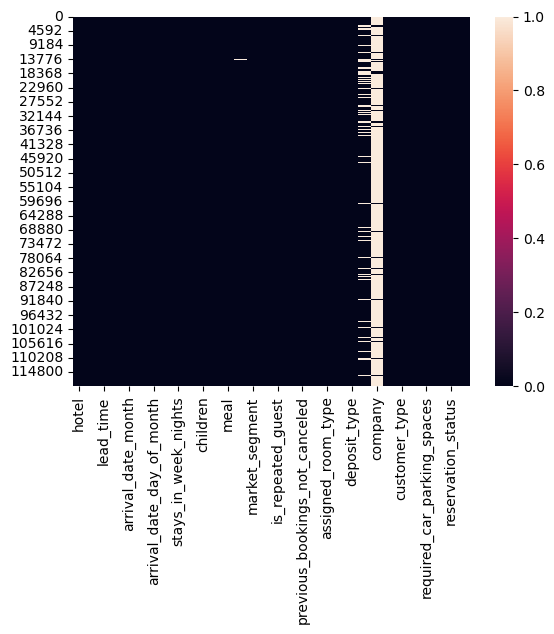

In [80]:
sns.heatmap(data.isnull())

In [77]:
print(f"\nSummary of percentage of {B}NULL values{R} found in the features :\n")
for col in data.columns:
    null_percentage = round((data[col].isnull().sum()/len(data) * 100), 2)
    if null_percentage > 0:
        print(f"{col:<10} : {B}{null_percentage}{R}")


Summary of percentage of NULL values found in the features :

country    : 0.41
agent      : 13.69
company    : 94.31


### We can observe `company` has 94.31% of missing data, hence we can drop the feature to remove noise and for better analysis of other features.

In [89]:
data.shape

(119390, 32)

In [90]:
data.drop('company', axis = 1, inplace = True)
data.shape

(119390, 31)

In [91]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [96]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [97]:
data.select_dtypes(include=['category']).columns.tolist()

[]